In [49]:
import re, json
import subprocess
import datetime
import time

from pymongo import MongoClient

In [50]:
conn = MongoClient("127.0.0.1:27017")
# Mongodb database
db = conn['CtnrSysLtdMetrcs']

In [403]:
for i in range (100):
    ts = time.time()
    stmp = datetime.datetime.fromtimestamp(ts).strftime("%Y-%m-%d %H:%M:%S")
    date = datetime.datetime.fromtimestamp(ts).strftime("%Y-%m-%d")
    
    # Create new collection for the day or use existing one
    coll = db[date]
    # Fetch docker container metrics from linux terminal
    ln = list(subprocess.getoutput("docker stats --no-stream").split("\n"))
    dictionary = []
    for i in range(0,ln.__len__()):
        ln[i] = re.split('\s{2,}', ln[i])
        if i == 0:
            continue
        dictionary.append(dict(zip(ln[0], ln[i])))
    # Prettify JSON object
    jdumps = json.dumps(dictionary, indent=4, sort_keys=True)
    # Insert to local MongoDB
    coll.insert_one({stmp:jdumps})
    # Wait 10s before updating
    #time.sleep(10)

In [367]:
for i in coll.find():
    #print(i['2018-08-02 20:00:37'])
    print(eval(i[str(list(i.keys())[1])]))

[{'BLOCK I/O': '0B / 0B', 'CONTAINER ID': '04368e869ef9', 'CPU %': '0.00%', 'MEM %': '0.01%', 'MEM USAGE / LIMIT': '856KiB / 7.697GiB', 'NAME': 'focused_kilby', 'NET I/O': '12kB / 0B', 'PIDS': '1'}, {'BLOCK I/O': '270kB / 0B', 'CONTAINER ID': 'd17d4b20e51a', 'CPU %': '102.40%', 'MEM %': '0.01%', 'MEM USAGE / LIMIT': '936KiB / 7.697GiB', 'NAME': 'boring_yalow', 'NET I/O': '12kB / 0B', 'PIDS': '1'}, {'BLOCK I/O': '0B / 0B', 'CONTAINER ID': 'ca0bd2dd4dd2', 'CPU %': '0.00%', 'MEM %': '0.01%', 'MEM USAGE / LIMIT': '852KiB / 7.697GiB', 'NAME': 'cocky_vaughan', 'NET I/O': '12.1kB / 0B', 'PIDS': '1'}, {'BLOCK I/O': '41kB / 0B', 'CONTAINER ID': 'e20b658d5069', 'CPU %': '0.00%', 'MEM %': '0.01%', 'MEM USAGE / LIMIT': '768KiB / 7.697GiB', 'NAME': 'eager_heyrovsky', 'NET I/O': '12.1kB / 0B', 'PIDS': '1'}, {'BLOCK I/O': '2.34MB / 0B', 'CONTAINER ID': '3c597b947915', 'CPU %': '0.02%', 'MEM %': '0.02%', 'MEM USAGE / LIMIT': '1.211MiB / 7.697GiB', 'NAME': 'loving_meninsky', 'NET I/O': '85.2kB / 66.8kB

In [404]:
#results = coll.find().sort("_id",-1).limit(1)

results = coll.find()

List = []
mem = {}
cpu = {}

for record in results:
    try:
        #List.append(list(record.keys())[1][-5:])
        List.append(list(record.keys())[1])
        temp = eval(record[str(list(record.keys())[1])])
        #print(temp)
        memTmpDct = {}
        cpuTmpDct = {}
        #print(json.dumps(temp, indent=4, sort_keys=True))
        for dictitem in temp:
            memTmpDct[dictitem["CONTAINER ID"]] = dictitem['MEM %']
            cpuTmpDct[dictitem["CONTAINER ID"]] = dictitem['CPU %']
            #print(dictitem)
        mem[list(record.keys())[1]] = memTmpDct
        cpu[list(record.keys())[1]] = cpuTmpDct
    except:
        pass
# Close database
#conn.close()
#print(np.array(List))

#print(json.dumps(mem, indent=4, sort_keys=True))
#print(json.dumps(cpu, indent=4, sort_keys=True))
#print(json.dumps(List, indent=4, sort_keys=True))
#print(np.array(list(mem.keys())))
#xargs = []
#for i in mem.keys():
#    x = list(mem[i].values())
#    xargs.append([float(X[:4]) for X in x])
#print(xargs)
#Label = list(mem[list(mem.keys())[1]].keys())
#Label

In [230]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

ValueError: Unrecognized character 0 in format string

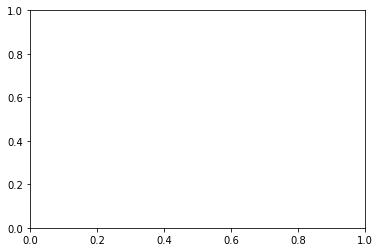

In [254]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ani = animation.FuncAnimation(fig, animate(mem,'04368e869ef9'), interval=1000)
plt.show()

In [253]:
def animate(Dict, cntr):
    xar = list(Dict.keys())[0]
    yar = Dict[xar][cntr]
    ax1.clear()
    ax1.plot(xar, yar)

In [312]:
list(mem.keys())

['2018-08-02 15:01:28',
 '2018-08-02 15:16:56',
 '2018-08-02 16:42:01',
 '2018-08-02 16:48:35',
 '2018-08-02 16:48:38',
 '2018-08-02 16:48:41',
 '2018-08-02 16:48:43',
 '2018-08-02 18:58:52']

In [405]:
dumY = []
for j in cpu[list(cpu.keys())[0]].keys():
    dum = []
    for i in cpu.keys():
        x = cpu[i][j]
        dum.append(float(x[:4]))
    dumY.append(dum)
print(dumY)

[[0.0, 73.2, 30.5, 25.5, 95.1, 0.0, 49.0, 84.3, 0.0, 65.4, 81.5, 0.0, 78.4, 52.4, 8.91, 94.5, 8.27, 70.3, 43.2, 55.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [69.0, 40.2, 90.0, 74.9, 0.0, 65.9, 41.1, 47.8, 89.5, 0.0, 68.4, 84.1, 2.99, 66.8, 76.5, 0.0, 83.1, 39.6, 15.1, 58.5, 22.1, 0.0, 91.6, 36.3, 10.7, 107.0, 0.0, 0.0, 82.5, 22.2, 79.3, 31.2, 69.1, 55.1, 42.8, 65.9, 19.4, 79.9, 56.7, 11.1, 27.3, 78.4, 18.3, 47.1, 14.3, 35.5, 60.0, 7.18, 76.2, 42.6, 105.0, 74.7, 36.9, 76.0, 0.78, 88.8, 69.4, 0.0, 79.6, 23.5, 29.2, 96.3, 0.0, 62.4, 82

In [136]:
dir(coll)

['_BaseObject__codec_options',
 '_BaseObject__read_concern',
 '_BaseObject__read_preference',
 '_BaseObject__write_concern',
 '_Collection__create',
 '_Collection__create_index',
 '_Collection__database',
 '_Collection__find_and_modify',
 '_Collection__full_name',
 '_Collection__name',
 '_Collection__write_response_codec_options',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aggregate',
 '_command',
 '_count',
 '_delete',
 '_delete_retryable',
 '_insert',
 '_insert_one',
 '_legacy_write',
 '_socket_for_primary_reads',
 '_socket_for_reads',
 '_socket_for_writes',
 '_update',
 '_update_retryable'

In [59]:
type(db.list_collection_names())

list

In [390]:
dir(time)
conn.drop_database("CtnrSysLtdMetrcs")
#coll.delete_one({"_id":"5b62ee1a0fa184339aa036cc"})


In [347]:
print(subprocess.getoutput("docker stats --no-stream"))

CONTAINER ID        NAME                CPU %               MEM USAGE / LIMIT     MEM %               NET I/O             BLOCK I/O           PIDS
04368e869ef9        focused_kilby       0.00%               856KiB / 7.697GiB     0.01%               11.8kB / 0B         0B / 0B             1
d17d4b20e51a        boring_yalow        105.50%             936KiB / 7.697GiB     0.01%               11.8kB / 0B         270kB / 0B          1
ca0bd2dd4dd2        cocky_vaughan       0.00%               852KiB / 7.697GiB     0.01%               11.9kB / 0B         0B / 0B             1
e20b658d5069        eager_heyrovsky     0.00%               768KiB / 7.697GiB     0.01%               11.9kB / 0B         41kB / 0B           1
3c597b947915        loving_meninsky     0.02%               1.211MiB / 7.697GiB   0.02%               53.6kB / 35.3kB     2.34MB / 0B         2


In [91]:
ts = time.time()
stmp = datetime.datetime.fromtimestamp(ts).strftime("%Y-%m-%d %H:%M:%S")
date = datetime.datetime.fromtimestamp(ts).strftime("%Y-%m-%d")
stmp, date

('2018-08-02 14:30:15', '2018-08-02')

In [143]:
coll.find().limit(1).map(docs => Object.keys(docs))

SyntaxError: invalid syntax (<ipython-input-143-25ed783c66bb>, line 1)

In [158]:
import numpy as np
np.random.seed(444)

matplotlib.axes._subplots.AxesSubplot

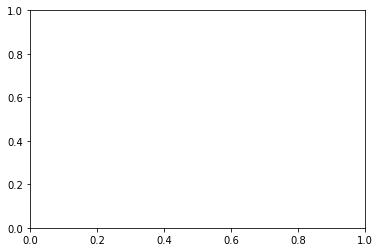

In [164]:
fig, ax = plt.subplots()
type(ax)

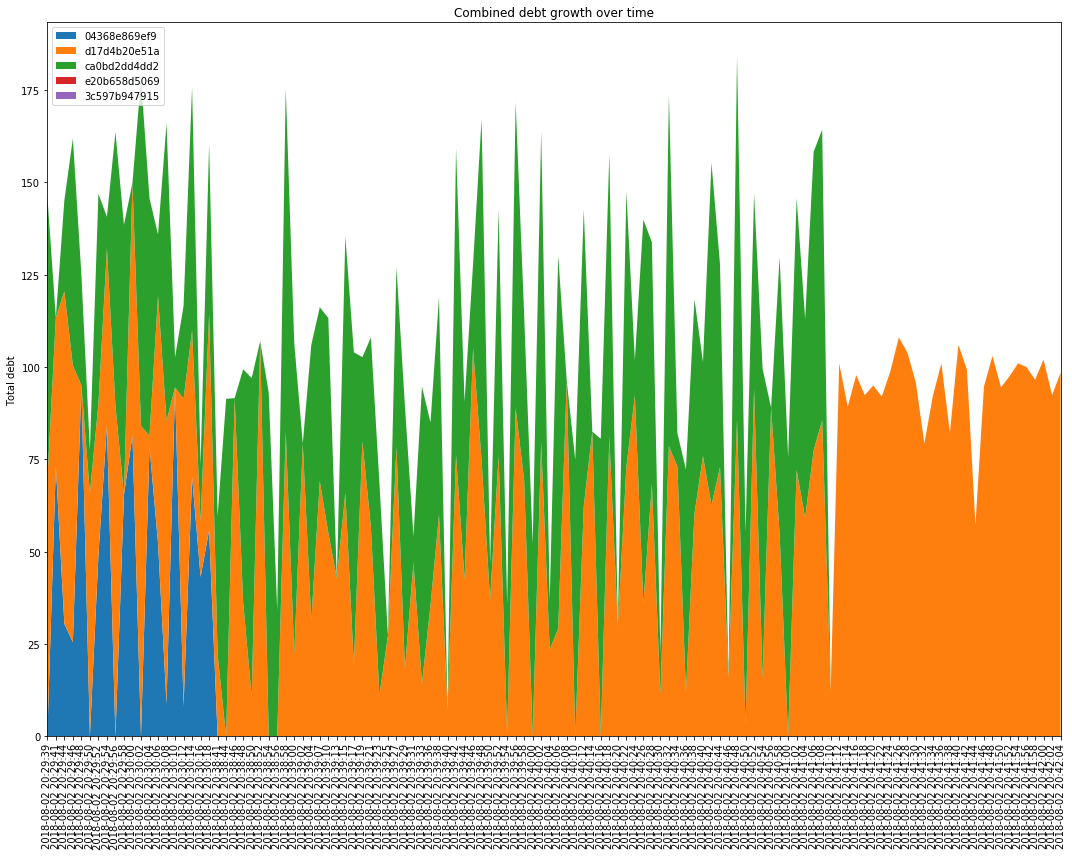

In [406]:
#rng = np.arange(50)
#rnd = np.random.randint(0, 10, size=(3, rng.size))
#yrs = 1950 + rng
#print(rng + rnd)
tme = list(mem.keys())
fig, ax = plt.subplots(figsize=(15,12))
ax.stackplot(tme, dumY, labels=Label)
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=tme[0], xmax=tme[-1])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.tight_layout()

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

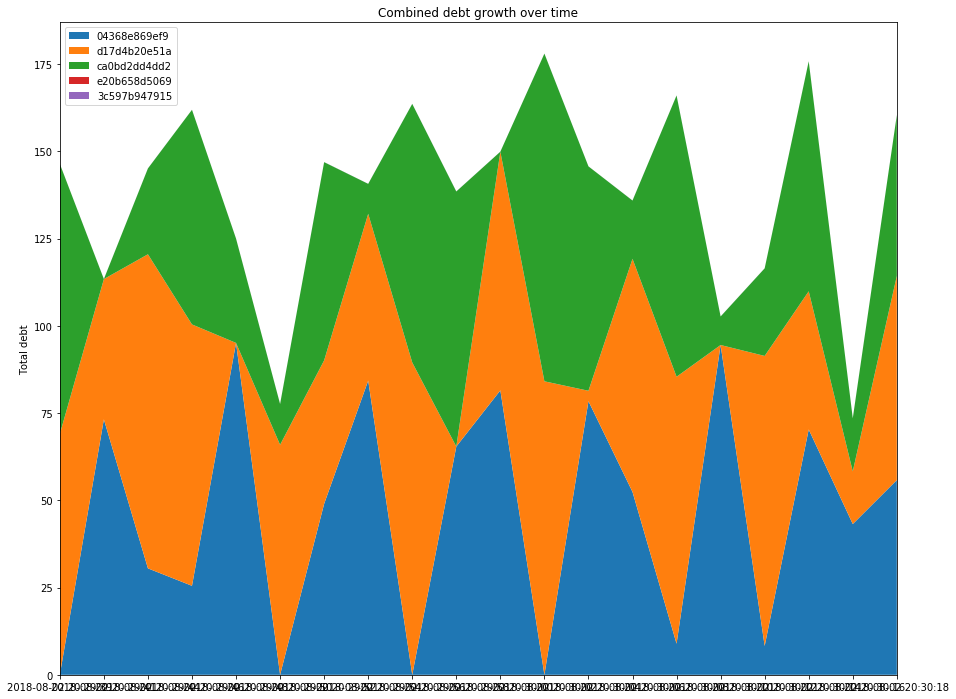

In [399]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_o

In [162]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

In [159]:
import matplotlib.pyplot as plt

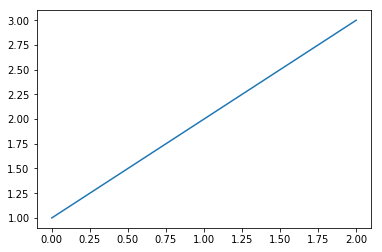

In [160]:
plt.plot([1, 2, 3])